Importamos las librerías que vamos a utilizar 

La biblioteca ta (Technical Analysis Library) es una biblioteca de Python que proporciona herramientas para el análisis técnico de datos financieros. Esta biblioteca incluye una variedad de funciones para calcular indicadores técnicos comunes, como medias móviles, RSI (Índice de fuerza relativa), MACD (Convergencia/divergencia de medias móviles), entre otros.

La biblioteca threading en Python proporciona una forma de ejecutar múltiples hilos de ejecución de forma simultánea dentro de un programa. Un hilo es una secuencia de ejecución independiente dentro de un proceso. La ejecución de múltiples hilos permite que un programa realice múltiples tareas al mismo tiempo, mejorando así la eficiencia y la capacidad de respuesta.

Aquí hay algunas características clave de la biblioteca threading:

Hilos: Los hilos en Python se pueden crear utilizando la clase Thread de la biblioteca threading. Cada instancia de Thread representa un hilo de ejecución separado.

Método start(): El método start() se utiliza para iniciar la ejecución de un hilo. Cuando se llama a este método, el hilo comienza a ejecutar su método run().

Método run(): El método run() es el punto de entrada del hilo. Este método define el comportamiento del hilo y se ejecuta cuando se inicia el hilo utilizando start().
Método join(): El método join() se utiliza para esperar a que un hilo termine su ejecución. Esto permite que el programa principal espere a que todos los hilos secundarios finalicen antes de continuar.

Locks y semáforos: La biblioteca threading también proporciona mecanismos para sincronizar el acceso a recursos compartidos entre múltiples hilos, como Lock y Semaphore, para evitar condiciones de carrera y garantizar la coherencia de los datos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
import ta
import time
import threading




In [3]:
def get_top_us_companies():
    # Símbolos de las 10 principales empresas en Estados Unidos en Yahoo Finance
    top_companies_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'BRK-A', 'BRK-B', 'JPM']
    
    top_companies_data = []
    
    for symbol in top_companies_symbols:
        try:
            company = yf.Ticker(symbol)
            company_info = {
                "Nombre de la empresa": company.info.get("longName"),
                "Símbolo": symbol,
                "Sector": company.info.get("sector"),
                "Industria": company.info.get("industry"),
                "Precio actual": company.history(period="1d").iloc[-1]['Close']
            }
            top_companies_data.append(company_info)
        except Exception as e:
            print(f"Error al obtener datos para {symbol}: {str(e)}")
    
    return top_companies_data

# Obtener los datos de las 10 principales empresas en Estados Unidos
top_us_companies = get_top_us_companies()

# Imprimir los datos de las empresas
for company_info in top_us_companies:
    print("Nombre de la empresa:", company_info.get("Nombre de la empresa"))
    print("Símbolo:", company_info.get("Símbolo"))
    print("Sector:", company_info.get("Sector"))
    print("Industria:", company_info.get("Industria"))
    print("Precio actual:", company_info.get("Precio actual"))
    print("-------------------------------------------")

Nombre de la empresa: Apple Inc.
Símbolo: AAPL
Sector: Technology
Industria: Consumer Electronics
Precio actual: 169.02000427246094
-------------------------------------------
Nombre de la empresa: Microsoft Corporation
Símbolo: MSFT
Sector: Technology
Industria: Software - Infrastructure
Precio actual: 409.05999755859375
-------------------------------------------
Nombre de la empresa: Amazon.com, Inc.
Símbolo: AMZN
Sector: Consumer Cyclical
Industria: Internet Retail
Precio actual: 176.58999633789062
-------------------------------------------
Nombre de la empresa: Alphabet Inc.
Símbolo: GOOGL
Sector: Communication Services
Industria: Internet Content & Information
Precio actual: 159.1300048828125
-------------------------------------------
Nombre de la empresa: Alphabet Inc.
Símbolo: GOOG
Sector: Communication Services
Industria: Internet Content & Information
Precio actual: 161.10000610351562
-------------------------------------------
Nombre de la empresa: Meta Platforms, Inc.
Sím

In [3]:
def analyze_company(symbol):
    try:
        company = yf.Ticker(symbol)

        # Obtener el historial de precios de las acciones
        historical_data = company.history(period="max")

        # Obtener estadísticas financieras clave
        financial_info = company.info

        # Imprimir información
        print("Nombre de la empresa:", financial_info.get("longName"))
        print("Símbolo:", symbol)
        print("Sector:", financial_info.get("sector"))
        print("Industria:", financial_info.get("industry"))
        print("Precio actual:", financial_info.get("regularMarketPrice"))

        print("\nHistorial de precios de las acciones:")
        print(historical_data)

        print("\nEstadísticas financieras clave:")
        for key, value in financial_info.items():
            print(key + ':', value)
    
    except Exception as e:
        print(f"Error al analizar la empresa {symbol}: {str(e)}")

# Análisis de las empresas
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
for symbol in symbols:
    print("\nAnálisis para:", symbol)
    analyze_company(symbol)


Análisis para: AAPL
Nombre de la empresa: Apple Inc.
Símbolo: AAPL
Sector: Technology
Industria: Consumer Electronics
Precio actual: None

Historial de precios de las acciones:
                                 Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.099192    0.099623    0.099192    0.099192   
1980-12-15 00:00:00-05:00    0.094448    0.094448    0.094017    0.094017   
1980-12-16 00:00:00-05:00    0.087548    0.087548    0.087117    0.087117   
1980-12-17 00:00:00-05:00    0.089273    0.089704    0.089273    0.089273   
1980-12-18 00:00:00-05:00    0.091861    0.092292    0.091861    0.091861   
...                               ...         ...         ...         ...   
2024-04-17 00:00:00-04:00  169.610001  170.649994  168.000000  168.000000   
2024-04-18 00:00:00-04:00  168.029999  168.639999  166.550003  167.039993   
2024-04-19 00:00:00-04:00  166.210007  166.399994  1

In [4]:
def analyze_company_advanced(symbol):
    try:
        company = yf.Ticker(symbol)
        financial_info = company.info

        # Ratios financieros clave
        pe_ratio = financial_info.get("trailingPE")
        pb_ratio = financial_info.get("priceToBook")
        debt_to_equity = financial_info.get("debtToEquity")
        net_profit_margin = financial_info.get("profitMargins")
        gross_profit_margin = financial_info.get("grossMargins")

        # Crecimiento y rendimiento
        revenue_growth = financial_info.get("revenueGrowth")
        profit_growth = financial_info.get("profitGrowth")
        roe = financial_info.get("returnOnEquity")
        roa = financial_info.get("returnOnAssets")

        # Flujo de caja
        free_cash_flow = financial_info.get("freeCashflow")
        operating_cash_flow = financial_info.get("operatingCashflow")
        investing_cash_flow = financial_info.get("investingCashflow")
        financing_cash_flow = financial_info.get("financingCashflow")

        # Valoración
        dcf = financial_info.get("enterpriseToEbitda")

        # Devolver los resultados en un diccionario
        analysis_results = {
            "PE Ratio": pe_ratio,
            "PB Ratio": pb_ratio,
            "Debt to Equity Ratio": debt_to_equity,
            "Net Profit Margin": net_profit_margin,
            "Gross Profit Margin": gross_profit_margin,
            "Revenue Growth": revenue_growth,
            "Profit Growth": profit_growth,
            "ROE": roe,
            "ROA": roa,
            "Free Cash Flow": free_cash_flow,
            "Operating Cash Flow": operating_cash_flow,
            "Investing Cash Flow": investing_cash_flow,
            "Financing Cash Flow": financing_cash_flow,
            "DCF": dcf
        }

        return analysis_results
    
    except Exception as e:
        print(f"Error al analizar la empresa {symbol}: {str(e)}")
        return None

# Análisis avanzado de la empresa Apple
apple_analysis = analyze_company_advanced("AAPL")
if apple_analysis:
    print("\nAnálisis avanzado para Apple Inc. (AAPL):")
    for key, value in apple_analysis.items():
        print(key + ':', value)


Análisis avanzado para Apple Inc. (AAPL):
PE Ratio: 26.094385
PB Ratio: 35.006653
Debt to Equity Ratio: 145.803
Net Profit Margin: 0.26163
Gross Profit Margin: 0.45027
Revenue Growth: 0.021
Profit Growth: None
ROE: 1.5426899
ROA: 0.21181
Free Cash Flow: 86563127296
Operating Cash Flow: 116433002496
Investing Cash Flow: None
Financing Cash Flow: None
DCF: 20.077


PE Ratio (Precio/Ganancias): El PE Ratio indica cuánto estás pagando por cada dólar de ganancias de la empresa. En este caso, el PE Ratio de Apple es 25.96, lo que significa que el mercado valora las ganancias de Apple en aproximadamente 26 veces más que su precio actual de mercado. Un PE Ratio más bajo podría indicar que la empresa está subvaluada en comparación con sus ganancias.

1-PB Ratio (Precio/Valor en libros): El PB Ratio compara el precio actual de una acción con el valor en libros por acción, lo que proporciona una medida de cuánto estás pagando por los activos netos de la empresa. Un PB Ratio alto podría indicar que la empresa está sobrevaluada en comparación con su valor en libros.

2-Debt to Equity Ratio (Ratio de Deuda a Capital): Este ratio indica la proporción de la deuda de la empresa en comparación con su capital. Un valor alto puede indicar que la empresa está financiando una parte significativa de sus operaciones con deuda, lo que puede aumentar su riesgo financiero.

3-Net Profit Margin (Margen de Beneficio Neto): Este valor indica cuánto de cada dólar de ingresos se convierte en beneficio neto después de deducir todos los gastos. Un margen de beneficio neto más alto es generalmente preferible, ya que indica que la empresa es eficiente en la conversión de sus ingresos en ganancias.

4-Gross Profit Margin (Margen de Beneficio Bruto): Este valor indica cuánto de cada dólar de ingresos se convierte en beneficio bruto después de deducir los costos de producción. Un margen de beneficio bruto más alto es generalmente preferible, ya que indica que la empresa tiene un buen control sobre sus costos de producción.

5-Revenue Growth (Crecimiento de Ingresos): Este valor indica el crecimiento porcentual de los ingresos de la empresa en el último período reportado. Un crecimiento de ingresos positivo es deseable, ya que indica que la empresa está expandiendo su base de clientes o aumentando la demanda de sus productos/servicios.

6-Profit Growth (Crecimiento de Ganancias): Esta métrica indica el crecimiento porcentual de las ganancias de la empresa en el último período reportado. En este caso, parece que no se ha proporcionado un valor. Un crecimiento de ganancias positivo es deseable, ya que indica que la empresa está mejorando su rentabilidad con el tiempo.

7-ROE (Return on Equity - Retorno sobre el Patrimonio): Este valor indica la rentabilidad de la empresa en relación con el capital invertido por los accionistas. Un ROE más alto es generalmente preferible, ya que indica que la empresa está generando más ganancias con menos inversión de capital.

8-ROA (Return on Assets - Retorno sobre los Activos): Este valor indica la rentabilidad de la empresa en relación con sus activos totales. Un ROA más alto es generalmente preferible, ya que indica que la empresa está generando más ganancias con sus activos.

9-Free Cash Flow (Flujo de Caja Libre): Este valor representa la cantidad de efectivo disponible después de que la empresa haya cubierto todos los gastos operativos y de capital. Un flujo de caja libre positivo es deseable, ya que indica que la empresa tiene efectivo disponible para reinvertir en el negocio, pagar dividendos o reducir deudas.

10-Operating Cash Flow (Flujo de Caja Operativo): Este valor representa la cantidad de efectivo generado por las operaciones comerciales de la empresa. Un flujo de caja operativo positivo es esencial para el funcionamiento continuo del negocio.

11-Investing Cash Flow (Flujo de Caja de Inversión): Esta métrica indica la cantidad de efectivo utilizado para inversiones en activos de capital, como la compra de equipos o la adquisición de otras empresas.

12-Financing Cash Flow (Flujo de Caja de Financiación): Esta métrica indica la cantidad de efectivo utilizado para financiar las actividades de la empresa, como el pago de dividendos, la recompra de acciones o el pago de deudas.

13-DCF (Descuento de Flujos de Efectivo): Esta métrica representa el ratio entre el valor de la empresa (determinado por el mercado) y sus ganancias antes de intereses, impuestos, depreciación y amortización. Un DCF más bajo podría indicar que la empresa está subvaluada en comparación con sus ganancias antes de impuestos y otros gastos.

Este código realiza un análisis fundamental y técnico para la empresa Apple Inc. (AAPL). El análisis fundamental incluye métricas financieras clave como ingresos, beneficio neto, flujo de efectivo operativo, deuda, patrimonio neto, PE Ratio y PB Ratio. El análisis técnico grafica el historial de precios de cierre de las acciones de AAPL


Análisis fundamental para Apple Inc. (AAPL):
Revenue: 385706000384
Net Income: None
Operating Cash Flow: 116433002496
Debt: 108040003584
Equity: None
PE Ratio: 26.096424
PB Ratio: 35.009388


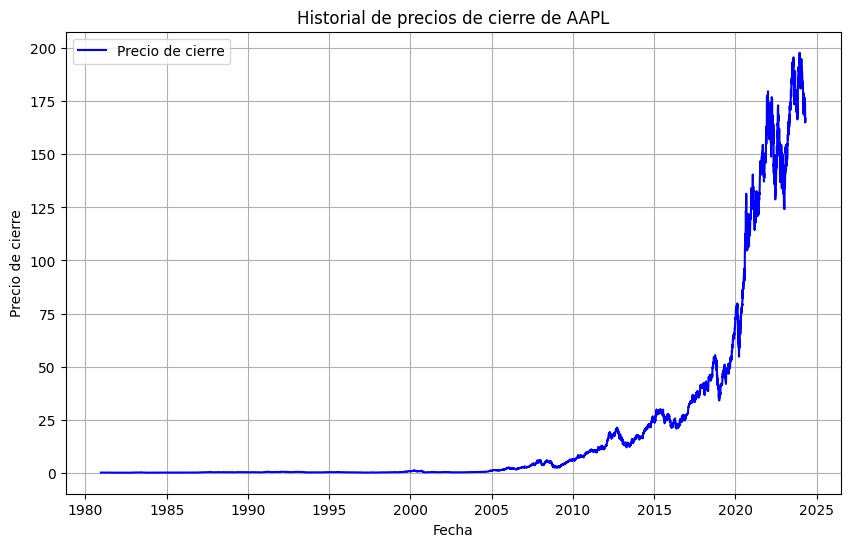

In [5]:
def fundamental_analysis(symbol):
    try:
        # Obtener información fundamental de la empresa
        company = yf.Ticker(symbol)
        info = company.info

        # Análisis fundamental
        revenue = info.get("totalRevenue")
        net_income = info.get("netIncome")
        operating_cash_flow = info.get("operatingCashflow")
        debt = info.get("totalDebt")
        equity = info.get("totalStockholderEquity")
        pe_ratio = info.get("trailingPE")
        pb_ratio = info.get("priceToBook")

        # Devolver los resultados en un diccionario
        fundamental_results = {
            "Revenue": revenue,
            "Net Income": net_income,
            "Operating Cash Flow": operating_cash_flow,
            "Debt": debt,
            "Equity": equity,
            "PE Ratio": pe_ratio,
            "PB Ratio": pb_ratio
        }

        return fundamental_results

    except Exception as e:
        print(f"Error al realizar análisis fundamental para {symbol}: {str(e)}")
        return None

def technical_analysis(symbol):
    try:
        # Obtener datos históricos de precios de cierre
        company = yf.Ticker(symbol)
        historical_data = company.history(period="max")

        # Análisis técnico: Graficar los precios de cierre
        plt.figure(figsize=(10, 6))
        plt.plot(historical_data.index, historical_data['Close'], label='Precio de cierre', color='blue')
        plt.title(f'Historial de precios de cierre de {symbol}')
        plt.xlabel('Fecha')
        plt.ylabel('Precio de cierre')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al realizar análisis técnico para {symbol}: {str(e)}")

# Ejemplo de análisis fundamental para Apple Inc. (AAPL)
fundamental_results_aapl = fundamental_analysis("AAPL")
if fundamental_results_aapl:
    print("\nAnálisis fundamental para Apple Inc. (AAPL):")
    for key, value in fundamental_results_aapl.items():
        print(key + ':', value)

# Ejemplo de análisis técnico para Apple Inc. (AAPL)
technical_analysis("AAPL")

Análisis técnico:
 El análisis técnico implica el estudio de gráficos de precios y datos de volumen para predecir futuros movimientos de precios. Puedes utilizar indicadores técnicos como medias móviles, RSI (Índice de fuerza relativa), MACD (Convergencia/divergencia de medias móviles), entre otros, para identificar tendencias y señales de compra/venta.

Este código calculará y graficará las medias móviles simples de 50 y 200 días, el RSI (Índice de fuerza relativa) y el MACD (Convergencia/divergencia de medias móviles) para las acciones de Apple Inc. (AAPL)


Para realizar un análisis técnico en Python utilizando indicadores como medias móviles, RSI y MACD, puedes utilizar bibliotecas como pandas, numpy y ta (Technical Analysis Library) que proporcionan funciones para calcular estos indicadores. 

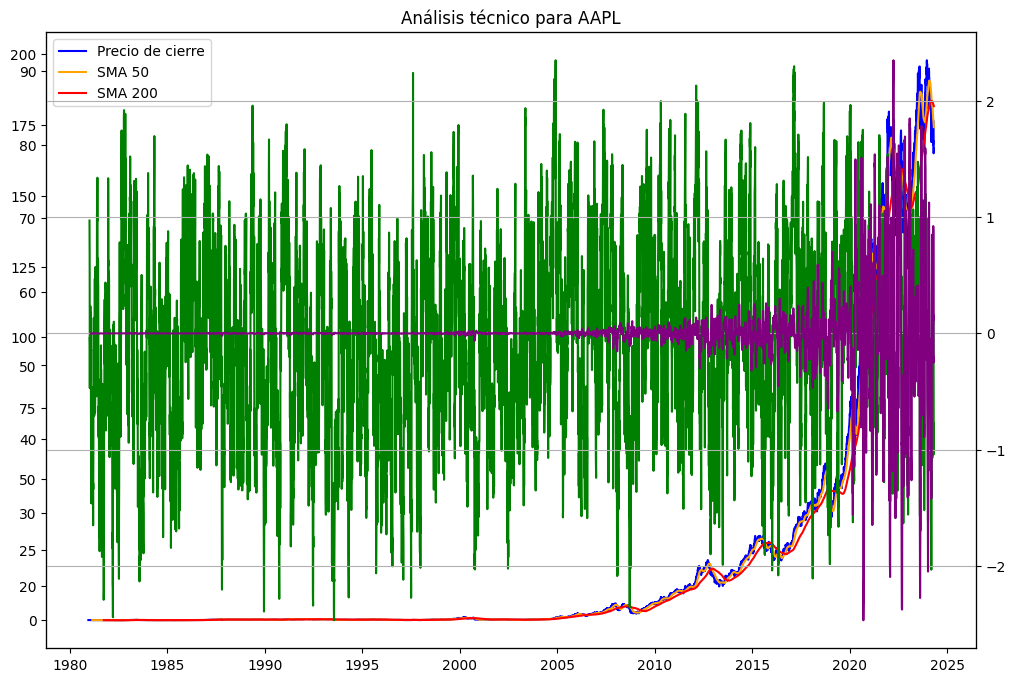

In [6]:
def technical_analysis(symbol):
    try:
        # Obtener datos históricos de precios de cierre
        company = yf.Ticker(symbol)
        historical_data = company.history(period="max")

        # Calcular medias móviles simples de 50 y 200 días
        historical_data['SMA50'] = ta.trend.sma_indicator(historical_data['Close'], window=50)
        historical_data['SMA200'] = ta.trend.sma_indicator(historical_data['Close'], window=200)

        # Calcular RSI (Índice de fuerza relativa)
        historical_data['RSI'] = ta.momentum.rsi(historical_data['Close'], window=14)

        # Calcular MACD (Convergencia/divergencia de medias móviles)
        historical_data['MACD'] = ta.trend.macd_diff(historical_data['Close'], window_slow=26, window_fast=12)

        # Graficar los precios de cierre junto con las medias móviles, RSI y MACD
        plt.figure(figsize=(12, 8))
        plt.plot(historical_data.index, historical_data['Close'], label='Precio de cierre', color='blue')
        plt.plot(historical_data.index, historical_data['SMA50'], label='SMA 50', color='orange')
        plt.plot(historical_data.index, historical_data['SMA200'], label='SMA 200', color='red')
        plt.legend()

        plt.twinx()
        plt.plot(historical_data.index, historical_data['RSI'], label='RSI', color='green')
        plt.twinx()
        plt.plot(historical_data.index, historical_data['MACD'], label='MACD', color='purple')

        plt.title(f'Análisis técnico para {symbol}')
        plt.xlabel('Fecha')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error al realizar análisis técnico para {symbol}: {str(e)}")

# Ejemplo de análisis técnico para Apple Inc. (AAPL)
technical_analysis("AAPL")

Comparar empresas dentro de la misma industria o sector puede proporcionar información valiosa sobre su desempeño relativo.

In [7]:
# Símbolos de las empresas que deseas comparar
simbolos_empresas = ["AAPL", "MSFT", "AMZN", "GOOGL"]

# Lista para almacenar los datos de las empresas
datos_empresas = []

# Obtener datos de cada empresa y agregarlos a la lista
for simbolo in simbolos_empresas:
    empresa = yf.Ticker(simbolo)
    datos = empresa.info
    datos_empresas.append(datos)

# Crear un DataFrame de pandas con los datos de las empresas
df_empresas = pd.DataFrame(datos_empresas)

# Seleccionar columnas relevantes para el análisis comparativo
columnas_relevantes = ["longName", "sector", "industry", "marketCap", "profitMargins", "pegRatio"]
df_empresas = df_empresas[columnas_relevantes]

# Renombrar las columnas para mayor claridad
df_empresas.columns = ["Empresa", "Sector", "Industria", "Capitalización de Mercado", "Margen de Beneficio", "Ratio PEG"]

# Mostrar el DataFrame con los resultados
print("Resultados del análisis comparativo entre empresas:")
print(df_empresas)

Resultados del análisis comparativo entre empresas:
                 Empresa                  Sector  \
0             Apple Inc.              Technology   
1  Microsoft Corporation              Technology   
2       Amazon.com, Inc.       Consumer Cyclical   
3          Alphabet Inc.  Communication Services   

                        Industria  Capitalización de Mercado  \
0            Consumer Electronics              2591459639296   
1       Software - Infrastructure              3042543927296   
2                 Internet Retail              1849600114688   
3  Internet Content & Information              1976688181248   

   Margen de Beneficio  Ratio PEG  
0              0.26163       2.32  
1              0.36269       2.18  
2              0.05293       1.42  
3              0.24007       1.20  


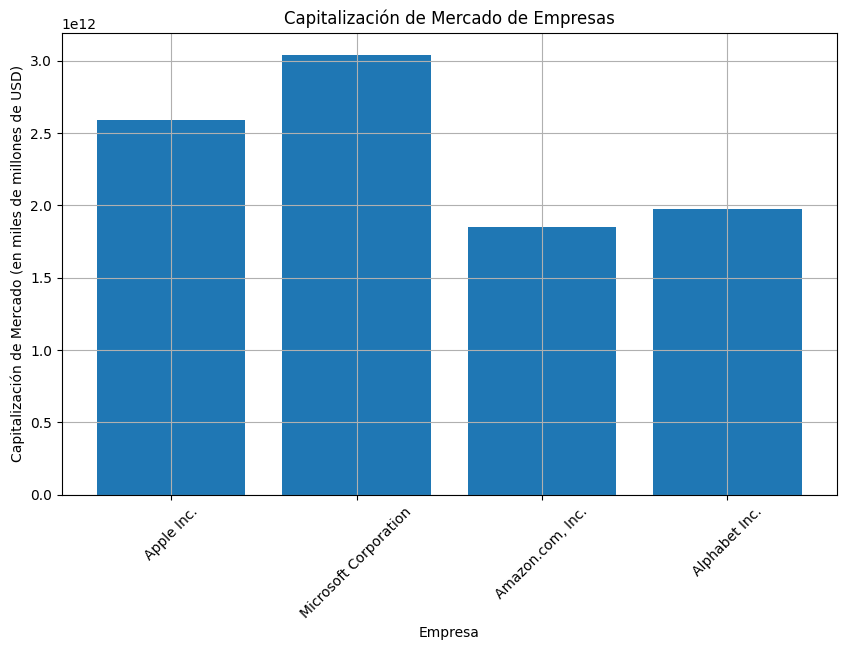

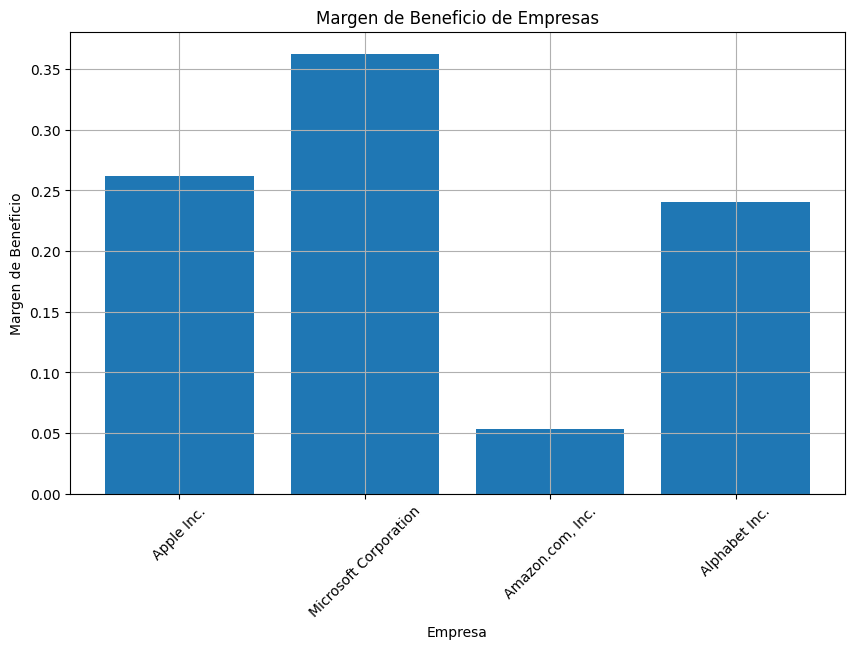

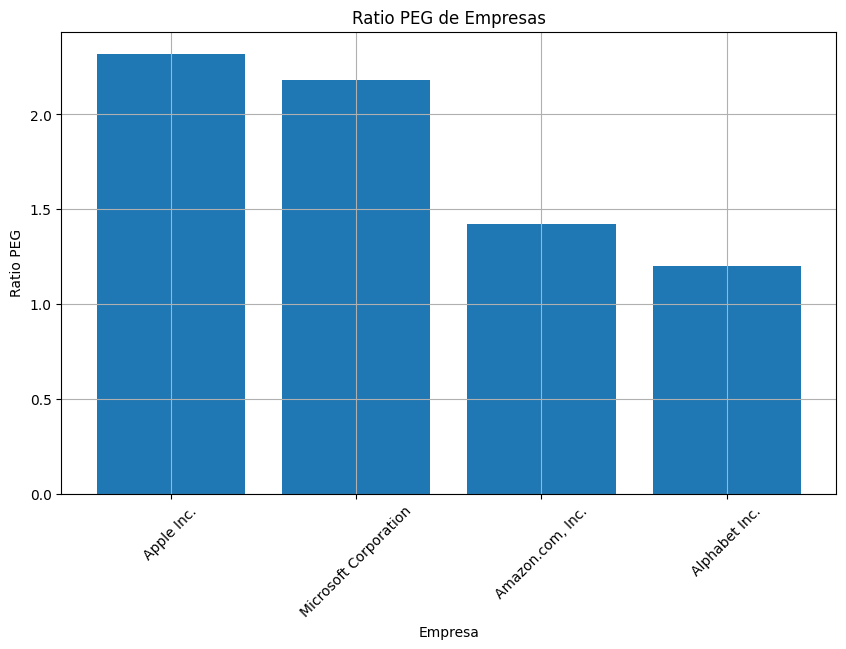

In [8]:
# Graficar la capitalización de mercado de las empresas
plt.figure(figsize=(10, 6))
plt.bar(df_empresas["Empresa"], df_empresas["Capitalización de Mercado"])
plt.title("Capitalización de Mercado de Empresas")
plt.xlabel("Empresa")
plt.ylabel("Capitalización de Mercado (en miles de millones de USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Graficar el margen de beneficio de las empresas
plt.figure(figsize=(10, 6))
plt.bar(df_empresas["Empresa"], df_empresas["Margen de Beneficio"])
plt.title("Margen de Beneficio de Empresas")
plt.xlabel("Empresa")
plt.ylabel("Margen de Beneficio")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Graficar el ratio PEG de las empresas
plt.figure(figsize=(10, 6))
plt.bar(df_empresas["Empresa"], df_empresas["Ratio PEG"])
plt.title("Ratio PEG de Empresas")
plt.xlabel("Empresa")
plt.ylabel("Ratio PEG")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

En este código:

Utilizamos la función history() de yfinance para obtener datos históricos de precios de las acciones de la empresa seleccionada.
Calculamos los rendimientos diarios de las acciones y luego su volatilidad como medida de riesgo.
Utilizamos la información proporcionada por yfinance sobre el sector e industria de la empresa.
Añadimos comentarios para indicar que se pueden considerar otros factores de riesgo externos como noticias, informes económicos, etc.

In [9]:
# Símbolo de la empresa de interés (por ejemplo, Apple Inc.)
empresa = yf.Ticker("AAPL")

# Obtener datos históricos de precios de las acciones
historial_precios = empresa.history(period="max")

# Calcular el rendimiento diario de las acciones
historial_precios['Daily Returns'] = historial_precios['Close'].pct_change()

# Calcular la volatilidad de los rendimientos diarios
volatilidad = historial_precios['Daily Returns'].std()

# Obtener información sobre el sector e industria de la empresa
sector = empresa.info['sector']
industria = empresa.info['industry']

# Obtener información sobre los riesgos operativos, regulatorios, geopolíticos, etc.
# Esto puede incluir noticias, informes de análisis, eventos económicos, etc.

# Imprimir resultados del análisis de riesgos
print("Análisis de Riesgos para", empresa.info['longName'])
print("Sector:", sector)
print("Industria:", industria)
print("Volatilidad de los rendimientos diarios:", volatilidad)

Análisis de Riesgos para Apple Inc.
Sector: Technology
Industria: Consumer Electronics
Volatilidad de los rendimientos diarios: 0.027944467078985655


La volatilidad de los rendimientos diarios es una medida que indica la magnitud de los cambios diarios en el precio de las acciones de una empresa. Cuanto mayor sea la volatilidad, mayor será el riesgo asociado con la inversión, ya que los cambios en el precio de las acciones pueden ser más pronunciados y menos predecibles.

En el caso de Apple Inc., la volatilidad de los rendimientos diarios es del 2.79%. Esto significa que, en promedio, el precio de las acciones de Apple puede fluctuar alrededor de un 2.79% en un día determinado. Una volatilidad relativamente baja como esta sugiere que los cambios diarios en el precio de las acciones de Apple tienden a ser moderados en comparación con otras empresas o sectores más volátiles.

Sin embargo, es importante recordar que la volatilidad es solo una medida de riesgo y no captura todos los posibles riesgos asociados con una inversión en una empresa. Otros factores, como los riesgos operativos, regulatorios, geopolíticos y competitivos, también deben tenerse en cuenta al evaluar la idoneidad de una inversión. Es fundamental realizar un análisis exhaustivo y considerar múltiples aspectos antes de tomar decisiones de inversión informadas.

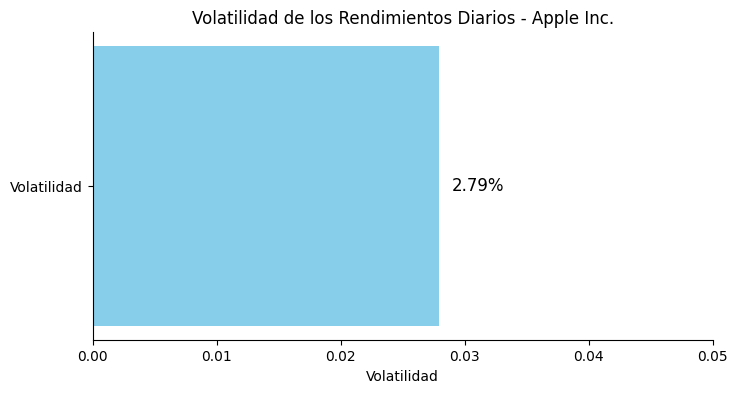

In [10]:
# Datos del análisis de riesgos para Apple Inc.
sector = "Technology"
industria = "Consumer Electronics"
volatilidad_diaria = 0.02794447324714135

# Crear una figura y un eje (plot)
fig, ax = plt.subplots(figsize=(8, 4))

# Graficar la volatilidad de los rendimientos diarios
ax.barh(["Volatilidad"], [volatilidad_diaria], color='skyblue')

# Añadir título y etiquetas de los ejes
ax.set_title("Volatilidad de los Rendimientos Diarios - Apple Inc.")
ax.set_xlabel("Volatilidad")
ax.set_xlim(0, 0.05)  # Establecer límites en el eje x para mejorar la visualización

# Quitar bordes de la gráfica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir texto con el valor de la volatilidad
ax.text(volatilidad_diaria + 0.001, 0, f"{volatilidad_diaria:.2%}", va='center', ha='left', color='black', fontsize=12)

# Mostrar el gráfico
plt.show()

Análisis de mercado: Estudiar las tendencias del mercado, las condiciones económicas y los factores macroeconómicos que podrían afectar el desempeño de las empresas y los sectores específicos.

El S&P 500, abreviatura de Standard & Poor's 500, es un índice bursátil que sigue el desempeño de las 500 mayores empresas públicas estadounidenses que cotizan en las bolsas de valores de Estados Unidos. Es uno de los índices más ampliamente seguidos y utilizados como indicador del mercado de valores en general, así como de la economía estadounidense.

El S&P 500 se utiliza como referencia para medir el rendimiento general del mercado de valores y como base para la creación de fondos de inversión y otros productos financieros. Las empresas incluidas en el índice son seleccionadas por el Comité de Índices de S&P Dow Jones Indices, con el objetivo de representar diversos sectores y segmentos de la economía estadounidense.

El S&P 500 se calcula utilizando una metodología de capitalización de mercado, donde el peso de cada empresa en el índice se basa en su capitalización de mercado total. Esto significa que las empresas más grandes tienen un mayor impacto en el índice en comparación con las empresas más pequeñas.

En resumen, el S&P 500 es un importante indicador del mercado de valores estadounidense y se utiliza ampliamente como referencia para medir el rendimiento del mercado y tomar decisiones de inversión.








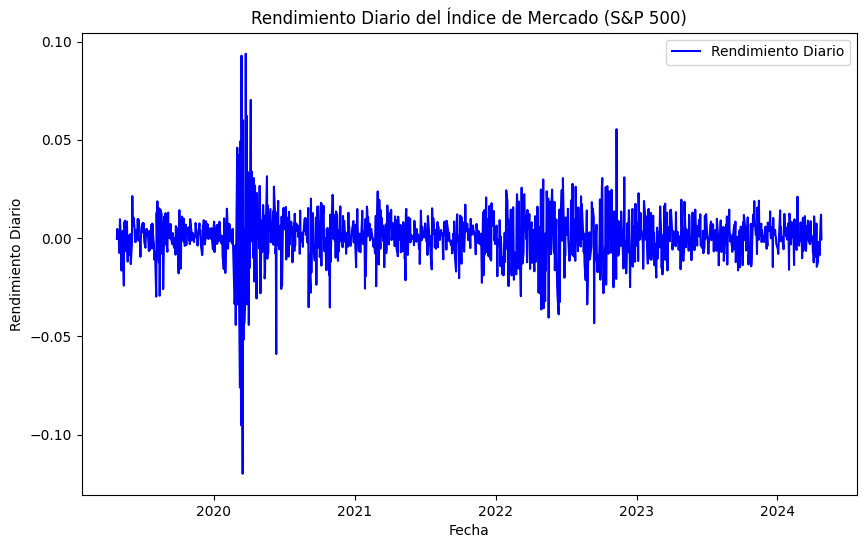

In [11]:
# Obtener datos históricos de un índice de mercado relevante (por ejemplo, S&P 500)
indice_mercado = yf.Ticker("^GSPC")
historial_mercado = indice_mercado.history(period="5y")  # Obtener datos de los últimos 5 años

# Calcular el rendimiento diario del índice de mercado
historial_mercado['Daily Returns'] = historial_mercado['Close'].pct_change()

# Obtener datos macroeconómicos relevantes (por ejemplo, tasas de interés, inflación, PIB)
# Puedes obtener estos datos de fuentes como la Reserva Federal, el Banco Mundial, etc.

# Realizar un análisis de tendencias y correlaciones entre los datos macroeconómicos y el rendimiento del mercado

# Crear una figura y un eje (plot)
plt.figure(figsize=(10, 6))

# Graficar el rendimiento diario del índice de mercado
plt.plot(historial_mercado.index, historial_mercado['Daily Returns'], color='blue', label='Rendimiento Diario')

# Añadir título y etiquetas de los ejes
plt.title("Rendimiento Diario del Índice de Mercado (S&P 500)")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento Diario")
plt.legend()

# Mostrar el gráfico
plt.show()

El resultado de este código es un gráfico que muestra el rendimiento diario del Índice de Mercado S&P 500 a lo largo de un período de tiempo específico. Este gráfico representa visualmente cómo ha fluctuado el rendimiento del índice en términos porcentuales en cada día durante el período seleccionado.

Aquí hay una  descripción de las partes principales del gráfico:

-El eje x muestra las fechas en las que se registraron los datos.

-El eje y representa el rendimiento diario del índice de mercado en términos porcentuales.

-La línea azul en el gráfico conecta los puntos que representan el rendimiento diario del índice a lo largo del tiempo.

-La leyenda indica qué representa la línea azul en el gráfico ("Rendimiento Diario").

-Este gráfico te proporciona una visualización de cómo han variado los rendimientos diarios del S&P 500 durante el período de tiempo seleccionado, lo que puede ayudarte a identificar tendencias, picos, valles y otros patrones en el rendimiento del mercado.

Las empresas "BRK-A", "BRK-B", "JNJ" y "V" se refieren a las siguientes compañías:

BRK-A: Berkshire Hathaway Inc. Clase A. Berkshire Hathaway es una empresa de inversiones y conglomerado diversificado con sede en Estados Unidos. Es dirigida por el inversionista Warren Buffett.

BRK-B: Berkshire Hathaway Inc. Clase B. Esta es una clase diferente de acciones de Berkshire Hathaway, que tiene un precio de mercado más bajo que las acciones de Clase A, pero otorgan los mismos derechos económicos y de voto.

JNJ: Johnson & Johnson. Johnson & Johnson es una empresa multinacional estadounidense de productos farmacéuticos, de cuidado personal y de consumo. Es conocida por marcas como Band-Aid, Tylenol, Neutrogena y Listerine, entre otras.

V: Visa Inc. Visa es una empresa global de tecnología financiera que facilita el procesamiento de pagos electrónicos en todo el mundo. Proporciona productos y servicios relacionados con transacciones financieras, incluidas tarjetas de crédito, débito y prepago.

Estas empresas son algunas de las más grandes y prominentes en sus respectivas industrias y son componentes importantes de los mercados financieros.